###### Finally found some time - and wanted to share with you something new, that I use extensivelly both in my work and on Kaggle.
###### What is KNIME?:
* it is open source/free, heavy lifting DS/DE platform/framework (Java based, allows for out-of-memory datasets to be processed)
* it allows for complete DS/ML pipelines to be created, mostly in visual manner
* it packs also (pretty much) every existing ML framework/library out there
* it also has full Python and R integrations and allows to freely mix those in the same pipeline  

Small disclaimer before we continue: This is NOT and AD, I don't work for KNIME, nor they are paying me. It is just something that I like and find extremely usefull - and wanted to share with you.

Download, unpack and configure KNIME runtime.
Move the unpacked workflow (pipeline) from knime-cat-publ datasource to the workspace directory.
If you want to see/edit the workflow - need to download KNIME Analytics Platform from their website (it is standalone, portable java application) - and then import cat_publ.knwf (provided with the source) into your local workspace (from the GUI).  

In [ ]:
# download runtime and unpack
!wget https://download.knime.org/analytics-platform/linux/knime_4.1.2.linux.gtk.x86_64.tar.gz
!tar xvzf knime_4.1.2.linux.gtk.x86_64.tar.gz
!rm knime_4.1.2.linux.gtk.x86_64.tar.gz
!unzip ./knime_4.1.2/knime-workspace.zip -d ./knime_4.1.2/knime-workspace/
!rm ./knime_4.1.2/knime-workspace.zip
# copy the workflow
!cp -R /kaggle/input/knime-cat-publ ./knime_4.1.2/knime-workspace/
# set memory settings for the runtime
!sed -i 's/Xmx2048m/Xmx10240m/g' ./knime_4.1.2/knime.ini
# install runtime extensions - python and H2O integrations
!./knime_4.1.2/knime -application org.eclipse.equinox.p2.director -nosplash -consolelog -r 'http://update.knime.com/analytics-platform/4.1,http://update.knime.com/community-contributions/4.1,http://update.knime.com/community-contributions/trusted/4.1,http://update.knime.com/partner/4.1' -i 'org.knime.features.python2.feature.group,org.knime.features.ext.h2o.feature.group,org.knime.features.datageneration.feature.group' -d ./knime_4.1.2/
# install the wrapper python package
!pip install knime
# used in the workflow
!pip install dfply

Import and set variables

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import knime

# Any results you write to the current directory are saved as output.
knime.executable_path = "./knime_4.1.2/knime"
workspace = "./knime_4.1.2/knime-workspace"
workflow = "knime-cat-publ/cat_publ/cat_publ"

Import and visualize the workflow (pipeline)

In [ ]:
knime.Workflow(workflow_path=workflow,workspace_path=workspace)

What happens here:
* source files are read in data_in metanode and concatenated after (vertically)
* labeling is performed in lbl metanode
* one hot encoding in ohe (see example below)
* target encoding in tgt_enc node - using code from this great kernel (please upvote): https://www.kaggle.com/caesarlupum/2020-20-lines-target-encoding
* Z-score normalization in prep
* H2O GLM + LGB models - blended in subm_blend  

Of course there is a lot of functionality inside the metanodes. Here is an example of how ohe metanode looks like under the hood:

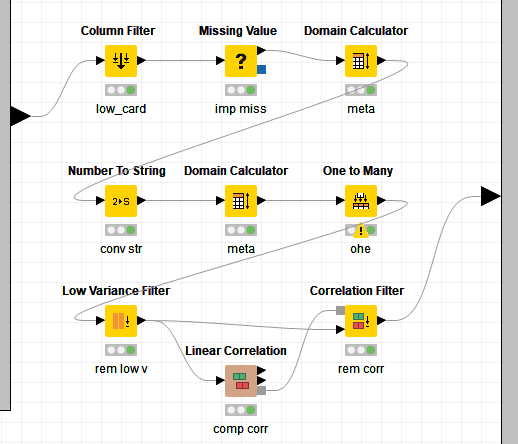

What happens here (ohe metanode internals):
* low cardinality features selected (only)
* missing values imputed
* columns one hot encoded
* low variance columns removed
* correlation matrix computed and highly correlated features removed (the extra instance)

Finally - run the workflow

In [ ]:
with knime.Workflow(workflow_path=workflow,workspace_path=workspace) as wf:
    wf.execute()

In [ ]:
# Alternatively wf can be executed through the command-line processor directly (instead of Python wrapper - you'll get more detailed output)
#!./knime_4.1.2/knime -nosplash -application org.knime.product.KNIME_BATCH_APPLICATION -workflowDir="./knime_4.1.2/knime-workspace/knime-cat-publ/cat_publ"

Cleanup

In [ ]:
rm -rf knime_4.1.2

Hopefully you liked it (please upvote) - and saw something new today. Let me know if you have any questions in the comments :)